Name: Prithvish Banerjee
The Sparks Foundation
Task 2

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [108]:
import chardet    
rawdata = open('C:\\Users\\prith\\Downloads\Iris.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

ascii


In [109]:
iris_data = pd.read_csv('C:\\Users\\prith\\Downloads\Iris.csv',encoding="ascii")

In [110]:
#structure of input iris dataset

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
#calculating squared distances sum for k = 1 to k = 15

squared_distances_sum = []
k_range = range(1,15)
for i in k_range:
    #find kmeans for every iteration
    kmeans_model = KMeans(n_clusters = i)
    kmeans_model.fit(iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
    #find sum of squared distances or inertia
    squared_distances_sum.append(kmeans_model.inertia_)
squared_distances_sum

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.95701115711987,
 34.190687924796634,
 29.881402210510913,
 27.943291820900527,
 26.12365138224349,
 24.183794094794106,
 23.286008233596466,
 21.18041125541125,
 20.133659451659458]

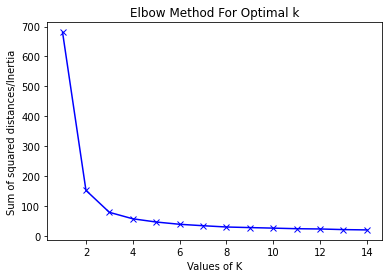

In [112]:
#Elbow curve

plt.plot(k_range,squared_distances_sum,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(k_range,squared_distances_sum,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [113]:
#KMeans clustering executed for optimal number of clusters found out by elbow curve method.

kmeans_optimal = KMeans(n_clusters = 3)
y_kmeans = kmeans_optimal.fit_predict(iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])

In [114]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0, 0.5, 'SepalWidthCm')

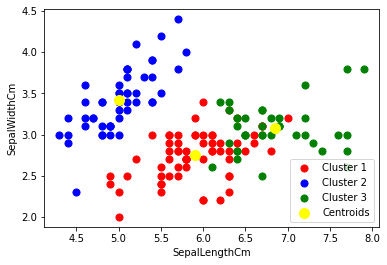

In [115]:
iris_data_series = iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
iris_data_values = iris_data_series.values
# iris_data_values[y_kmeans == 1,0]
# Visualising the clusters - On the first two columns SepalLengthCm SepalWidthCm
plt.scatter(iris_data_values[y_kmeans == 0, 0], iris_data_values[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(iris_data_values[y_kmeans == 1, 0], iris_data_values[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_data_values[y_kmeans == 2, 0], iris_data_values[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel(iris_data.columns[1])
plt.ylabel(iris_data.columns[2])

Text(0, 0.5, 'PetalWidthCm')

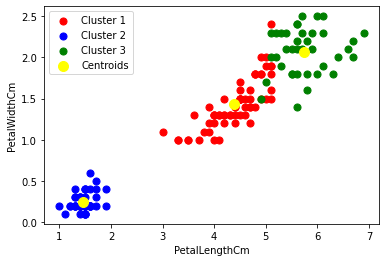

In [116]:
# Visualising the clusters - On PetalLengthCm PetalWidthCm
plt.scatter(iris_data_values[y_kmeans == 0, 2], iris_data_values[y_kmeans == 0, 3], 
            s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(iris_data_values[y_kmeans == 1, 2], iris_data_values[y_kmeans == 1, 3], 
            s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_data_values[y_kmeans == 2, 2], iris_data_values[y_kmeans == 2, 3],
            s = 50, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 2], kmeans_optimal.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel(iris_data.columns[3])
plt.ylabel(iris_data.columns[4])

Text(0, 0.5, 'PetalLengthCm')

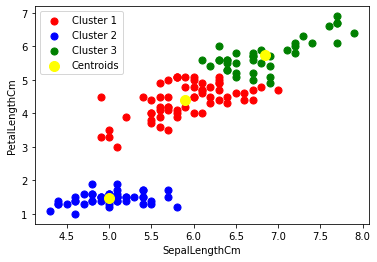

In [117]:
# Visualising the clusters - On SepalLengthCm PetalLengthCm
plt.scatter(iris_data_values[y_kmeans == 0, 0], iris_data_values[y_kmeans == 0, 2], 
            s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(iris_data_values[y_kmeans == 1, 0], iris_data_values[y_kmeans == 1, 2], 
            s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_data_values[y_kmeans == 2, 0], iris_data_values[y_kmeans == 2, 2],
            s = 50, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel(iris_data.columns[1])
plt.ylabel(iris_data.columns[3])

Text(0, 0.5, 'PetalWidthCm')

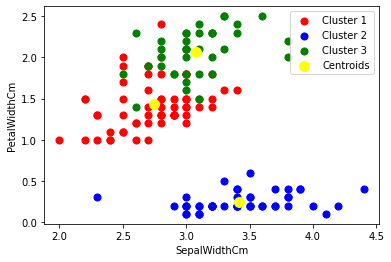

In [118]:
# Visualising the clusters - On SepalLengthCm PetalLengthCm
plt.scatter(iris_data_values[y_kmeans == 0, 1], iris_data_values[y_kmeans == 0, 3], 
            s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(iris_data_values[y_kmeans == 1, 1], iris_data_values[y_kmeans == 1, 3], 
            s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_data_values[y_kmeans == 2, 1], iris_data_values[y_kmeans == 2, 3],
            s = 50, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 1], kmeans_optimal.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel(iris_data.columns[2])
plt.ylabel(iris_data.columns[4])

Text(0, 0.5, 'PetalWidthCm')

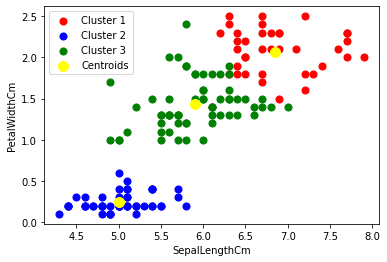

In [105]:
# Visualising the clusters - On SepalLengthCm PetalWidthCm
plt.scatter(iris_data_values[y_kmeans == 0, 0], iris_data_values[y_kmeans == 0, 3], 
            s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(iris_data_values[y_kmeans == 1, 0], iris_data_values[y_kmeans == 1, 3], 
            s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_data_values[y_kmeans == 2, 0], iris_data_values[y_kmeans == 2, 3],
            s = 50, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel(iris_data.columns[1])
plt.ylabel(iris_data.columns[4])

Text(0, 0.5, 'PetalLengthCm')

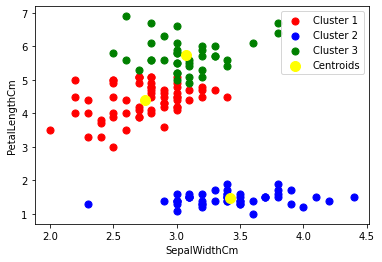

In [119]:
# Visualising the clusters - On SepalWidthCm PetalLengthCm
plt.scatter(iris_data_values[y_kmeans == 0, 1], iris_data_values[y_kmeans == 0, 2], 
            s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(iris_data_values[y_kmeans == 1, 1], iris_data_values[y_kmeans == 1, 2], 
            s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_data_values[y_kmeans == 2, 1], iris_data_values[y_kmeans == 2, 2],
            s = 50, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 1], kmeans_optimal.cluster_centers_[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel(iris_data.columns[2])
plt.ylabel(iris_data.columns[3])